In [336]:
!pip install scikit-plot

In [337]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [338]:
data=pd.read_csv(r'C:\Users\monish\Downloads\avocado.csv\avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### first we will remove the unnamed column

In [339]:
data=data.drop(columns=['Unnamed: 0'])

In [340]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


### As we can can see that there is 3 object i.e Date,type,region has to be converted

In [342]:
data.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### From the above cell,we can see that there is no null value

In [343]:
for each_col in data.columns:
    print(each_col)
    print(data[each_col].value_counts())
    print("")

Date
2017-12-17    108
2017-10-29    108
2015-04-19    108
2017-12-24    108
2017-11-05    108
             ... 
2017-02-12    108
2015-03-15    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64

AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.05      1
3.03      1
2.91      1
0.48      1
2.96      1
Name: AveragePrice, Length: 259, dtype: int64

Total Volume
3713.49      2
3529.44      2
2038.99      2
569349.05    2
4103.97      2
            ..
238229.99    1
344613.01    1
322940.72    1
2943.85      1
10187.56     1
Name: Total Volume, Length: 18237, dtype: int64

4046
0.00          242
3.00           10
1.24            8
1.00            8
4.00            8
             ... 
15880.80        1
659.34          1
475418.60       1
2294505.56      1
2688.00         1
Name: 4046, Length: 17702, dtype: int64

4225
0.00         61
215.36        3
177.87        3
1.30          3
94.74         3
          

# Before getting on to doing our predictions. Let us add 1 new columns.
## Revenue: It is TotalVolume * AveragePrice

In [344]:
data['revenue'] = data['Total Volume'] * data['AveragePrice']

In [345]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,27831.9729
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,23748.5484
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,25743.8412
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,31276.0746


In [346]:
#Is there a correlation between Total bags and Total volume
data[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.963047
Total Bags,0.963047,1.000000


<AxesSubplot:>

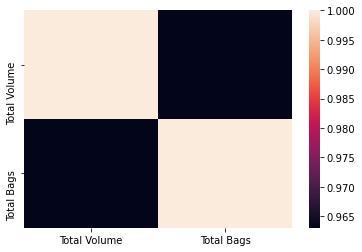

In [347]:
sns.heatmap(data[['Total Volume','Total Bags']].corr())

In [348]:
#'What was the average revenue of Avocado per year? (2015-2018) ?')
data.groupby('year')['revenue'].mean()

year
2015    7.993675e+05
2016    8.898843e+05
2017    1.042599e+06
2018    1.143783e+06
Name: revenue, dtype: float64

In [349]:
#Find max average revenue in the different region in last 4 years
data.groupby('region')['revenue'].mean().sort_values(ascending=False)

region
TotalUS                1.889820e+07
California             3.317793e+06
West                   3.156313e+06
Northeast              2.840260e+06
SouthCentral           2.585974e+06
Southeast              2.081747e+06
GreatLakes             2.037461e+06
Midsouth               1.821668e+06
LosAngeles             1.432626e+06
Plains                 1.065197e+06
NewYork                9.917028e+05
SanFrancisco           5.498050e+05
BaltimoreWashington    5.322735e+05
Chicago                5.299130e+05
DallasFtWorth          5.195541e+05
Houston                4.898560e+05
Denver                 4.319019e+05
PhoenixTucson          4.096197e+05
Boston                 3.743873e+05
Seattle                3.703524e+05
WestTexNewMexico       3.628818e+05
MiamiFtLauderdale      3.508329e+05
Portland               3.339189e+05
Philadelphia           2.953131e+05
Sacramento             2.804991e+05
Atlanta                2.774952e+05
SanDiego               2.767074e+05
NorthernNewEngland   

In [350]:
#Find Average price of Organic Avocado in last years of which regions?
 
organic = data[data['type'] == 'organic']
organic


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue
9126,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany,1810.8765
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany,2198.1267
9128,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany,1842.5260
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany,2131.4928
9130,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany,1613.4786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,27831.9729
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,23748.5484
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,25743.8412
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,31276.0746


In [351]:
#Find the average Organic Avacado revenue in last 4 years

organic.groupby('year')['revenue'].mean()

year
2015     48830.788492
2016     68413.056755
2017     96493.112381
2018    116460.390111
Name: revenue, dtype: float64

In [352]:
#Find the list of average Organic Avacado revenue in different regions in last 4 years

organic.groupby('region')['revenue'].mean().sort_values(ascending=False)

region
TotalUS                1.497380e+06
West                   3.261292e+05
Northeast              2.604400e+05
California             2.471970e+05
GreatLakes             1.908346e+05
Midsouth               1.707716e+05
SouthCentral           1.392742e+05
LosAngeles             1.111259e+05
NewYork                1.041180e+05
Southeast              9.539926e+04
Plains                 8.261817e+04
Seattle                6.794361e+04
Chicago                5.416904e+04
SanFrancisco           4.745454e+04
Portland               4.673824e+04
Denver                 4.298069e+04
BaltimoreWashington    3.954566e+04
Houston                2.851217e+04
DallasFtWorth          2.664709e+04
Philadelphia           2.496809e+04
Boston                 2.473007e+04
SanDiego               2.405823e+04
WestTexNewMexico       2.394541e+04
NorthernNewEngland     2.171201e+04
Detroit                2.070812e+04
HartfordSpringfield    2.053099e+04
CincinnatiDayton       2.032083e+04
PhoenixTucson        

In [353]:
#Find each year in last 4 years how many types of avacado got sold.
data.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [354]:
#Find the total no of revenue in each year of last 4 years
data.groupby('year')['revenue'].count()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: revenue, dtype: int64

<AxesSubplot:>

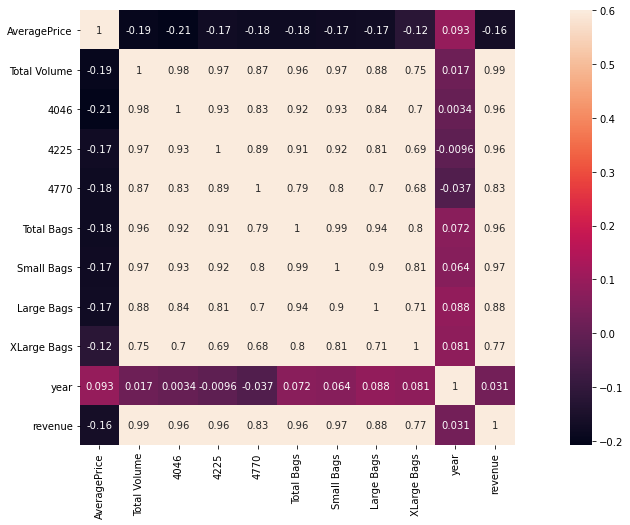

In [355]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), vmax=0.6, square=True, annot=True)

In [356]:
#Converting Date Type
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

In [357]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880,11,29


## now we will drop the date

In [358]:
data=data.drop(columns=['Date'])

In [359]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880,11,29


In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  revenue       18249 non-null  float64
 13  Month         18249 non-null  int64  
 14  Day           18249 non-null  int64  
dtypes: float64(10), int64(3), object(2)
memory usage: 2.1+ MB


### Now we will convert feature 'type' into numeric form

In [361]:
data['type'] = data['type'].map( {'conventional': 1, 'organic': 0} ).astype(int)

In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  revenue       18249 non-null  float64
 13  Month         18249 non-null  int64  
 14  Day           18249 non-null  int64  
dtypes: float64(10), int32(1), int64(3), object(1)
memory usage: 2.0+ MB


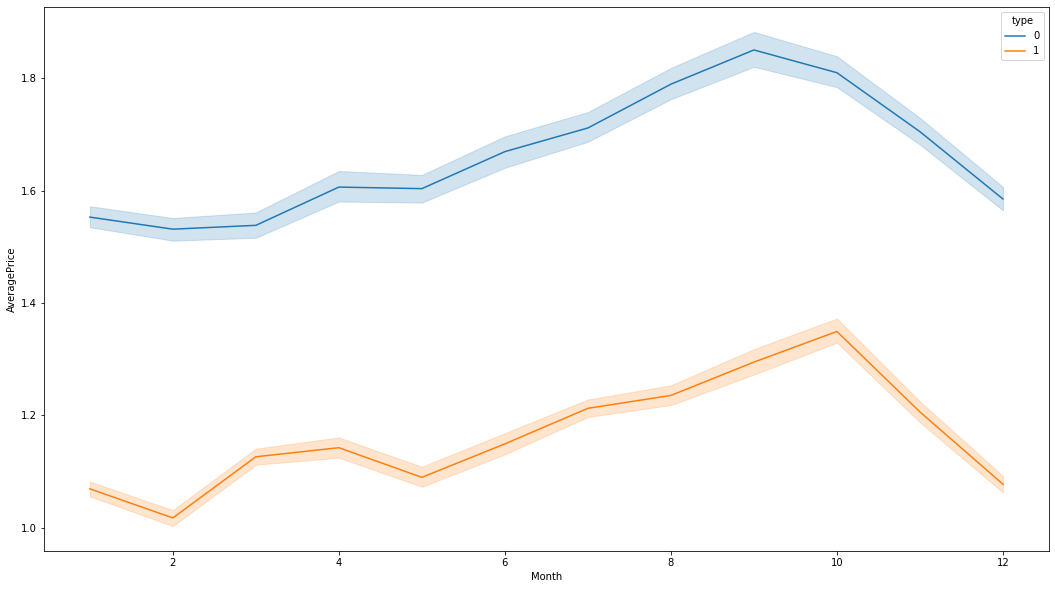

In [363]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=data)
plt.show()

In [364]:
data['Month'] = data['Month'].astype(int)
data['Day'] = data['Day'].astype(int)

In [365]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,revenue,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.500082,2016.147899,9.279484e+05,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,3.686048e+06,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,1.344504e+02,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,1.716418e+04,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,1.000000,2016.000000,1.395298e+05,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,5.141914e+05,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,5.437991e+07,12.000000,31.000000


### Now we will convert top 5 revenue region and other region as others

In [366]:
#data['region'] = data['region'].replace(['Midsouth','SouthCentral','LosAngeles','NewYork','Southeast','Seattle','Chicago','SanFrancisco','Portland','Denver','Sacramento','Charlotte','RichmondNorfolk','Roanoke','Columbus','Nashville','StLouis','Orlando','BuffaloRochester','Indianapolis','MiamiFtLauderdale','Jacksonville','GrandRapids','NewOrleansMobile',\
#     	'BaltimoreWashington','Houston','DallasFtWorth','Philadelphia','Boston','SanDiego','WestTexNewMexico','NorthernNewEngland','Detroit','HartfordSpringfield','CincinnatiDayton','PhoenixTucson','RaleighGreensboro','Atlanta','LasVegas','HarrisburgScranton','Pittsburgh','Tampa','Spokane','Syracuse','Albany','Boise','Louisville','Plains','SouthCarolina'], 'Otherregion')

#data[['region', 'AveragePrice']].groupby(['region'], as_index=False).mean()          

In [367]:
#title_mapping = {"TotalUS": 1, "West": 2, "Northeast": 3, "California": 4, "GreatLakes": 5, "Otherregion": 6}

#data['region'] = data['region'].map(title_mapping)
#data['region'] = data['region'].fillna(0)

In [368]:
for i in data.columns:
    if data[i].dtype=="object":
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        data[i]=le.fit_transform(data[i])

In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  revenue       18249 non-null  float64
 13  Month         18249 non-null  int32  
 14  Day           18249 non-null  int32  
dtypes: float64(10), int32(4), int64(1)
memory usage: 1.8 MB


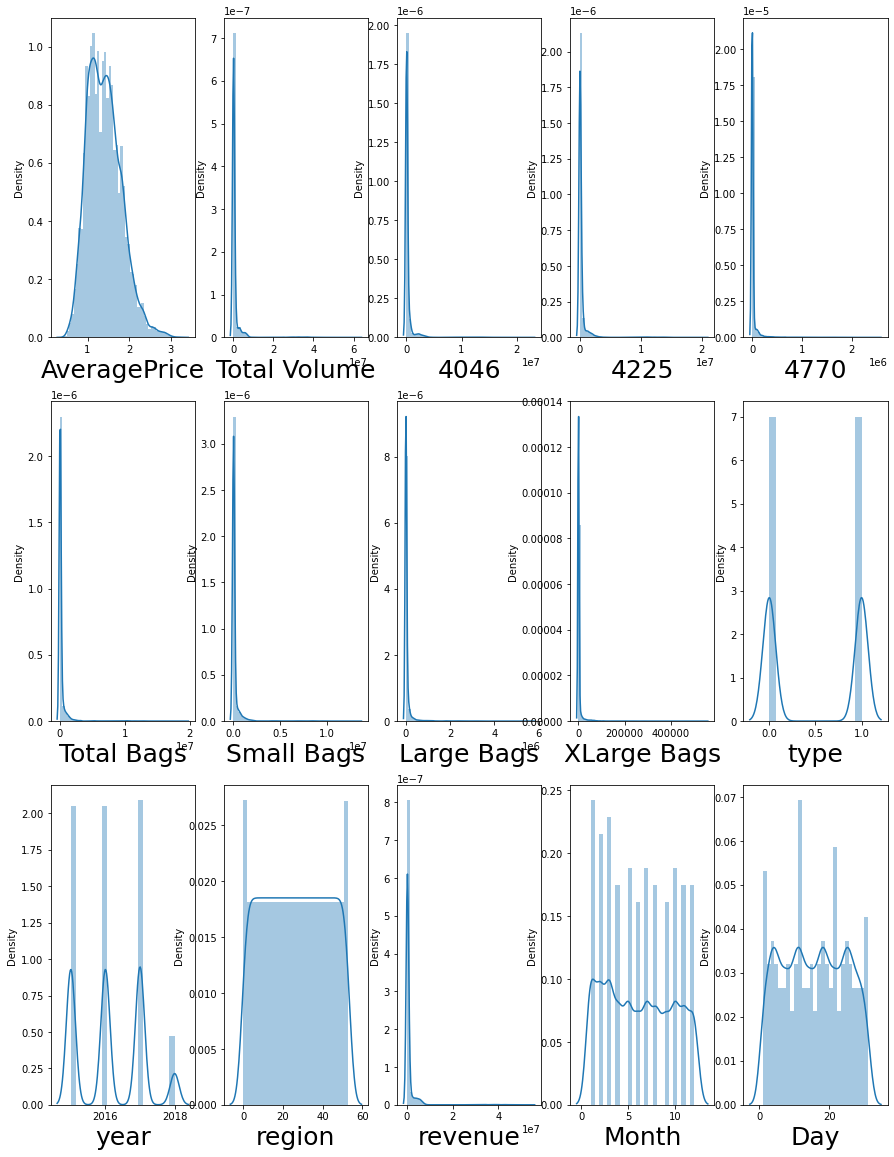

In [370]:
### Now we will visualize the data

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1


#for columns in data.columns.values:
for column in data:
    if plotnumber<=15:
        
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

In [371]:
from scipy.stats import zscore
import numpy as np

In [372]:
z=np.abs(zscore(data))
threshold=3
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(18249, 15)
(17651, 15)


In [373]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,0,85434.7046,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,0,74083.9230,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,0,109944.8046,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,0,85311.5220,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,0,65330.6880,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,0,2018,53,27831.9729,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,0,2018,53,23748.5484,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,0,2018,53,25743.8412,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,0,2018,53,31276.0746,1,14


In [374]:
data['RevenueBand'] = pd.qcut(data['revenue'], 5)
data[['RevenueBand', 'AveragePrice']].groupby(['RevenueBand'], as_index=False).mean().sort_values(by='RevenueBand', ascending=True)

,RevenueBand,AveragePrice
0,"(134.44899999999998, 13117.467]",1.646995
1,"(13117.467, 62862.602]",1.669268
2,"(62862.602, 235642.583]",1.330682
3,"(235642.583, 677055.895]",1.232570
4,"(677055.895, 54379912.472]",1.150356


In [375]:
data.loc[(data['revenue'] > 134.44899999999998) &  (data['revenue'] <= 13117.467), 'revenue'] = 0
data.loc[(data['revenue'] > 13117.467) & (data['revenue'] <= 62862.602), 'revenue'] = 1
data.loc[(data['revenue'] > 62862.602) & (data['revenue'] <= 235642.583), 'revenue']   = 2
data.loc[(data['revenue'] > 235642.583) & (data['revenue'] <= 677055.895), 'revenue']   = 3                                                    
data.loc[ data['revenue'] > 677055.895, 'revenue'] = 4
data['revenue'] = data['revenue'].astype(int)

data = data.drop(['RevenueBand'], axis=1)
    
data.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,0,2,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,0,2,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,0,2,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,0,2,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,0,2,11,29
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,1,2015,0,2,11,22
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,1,2015,0,2,11,15
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,1,2015,0,2,11,8
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,1,2015,0,2,11,1
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,1,2015,0,2,10,25


In [376]:
data['TotalVolumeBand'] = pd.qcut(data['Total Volume'], 5)
data[['TotalVolumeBand', 'AveragePrice']].groupby(['TotalVolumeBand'], as_index=False).mean().sort_values(by='TotalVolumeBand', ascending=True)

,TotalVolumeBand,AveragePrice
0,"(84.559, 8168.866]",1.717329
1,"(8168.866, 42137.088]",1.640712
2,"(42137.088, 192430.124]",1.363985
3,"(192430.124, 604868.968]",1.210951
4,"(604868.968, 62505646.52]",1.096904


In [377]:
data.loc[(data['Total Volume'] > 84.559) &  (data['Total Volume'] <= 8168.866), 'Total Volume'] = 0
data.loc[(data['Total Volume'] > 8168.866) & (data['Total Volume'] <= 42137.088), 'Total Volume'] = 1
data.loc[(data['Total Volume'] > 42137.088) & (data['Total Volume'] <= 192430.124), 'Total Volume']   = 2
data.loc[(data['Total Volume'] > 192430.124) & (data['Total Volume'] <= 604868.968), 'Total Volume']   = 3                                                    
data.loc[ data['Total Volume'] > 604868.968, 'Total Volume'] = 4
data['Total Volume'] = data['Total Volume'].astype(int)

data = data.drop(['TotalVolumeBand'], axis=1)
    
data.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,Month,Day
0,1.33,2,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,0,2,12,27
1,1.35,2,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,0,2,12,20
2,0.93,2,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,0,2,12,13
3,1.08,2,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,0,2,12,6
4,1.28,2,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,0,2,11,29
5,1.26,2,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,1,2015,0,2,11,22
6,0.99,2,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,1,2015,0,2,11,15
7,0.98,2,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,1,2015,0,2,11,8
8,1.02,2,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,1,2015,0,2,11,1
9,1.07,2,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,1,2015,0,2,10,25


In [378]:
data['4046Band'] = pd.qcut(data['4046'], 5)
data[['4046Band', 'AveragePrice']].groupby(['4046Band'], as_index=False).mean().sort_values(by='4046Band', ascending=True)

,4046Band,AveragePrice
0,"(-0.001, 483.362]",1.670455
1,"(483.362, 3261.58]",1.605630
2,"(3261.58, 31698.078]",1.465221
3,"(31698.078, 152679.068]",1.224362
4,"(152679.068, 22743616.17]",1.064241


In [379]:
data.loc[ data['4046'] <= 483.362, '4046'] = 0
data.loc[(data['4046'] > 483.362) & (data['4046'] <= 3261.58), '4046'] = 1
data.loc[(data['4046'] > 3261.58) & (data['4046'] <= 31698.078), '4046']   = 2
data.loc[(data['4046'] > 31698.078) & (data['4046'] <= 152679.068), '4046']   = 3
data.loc[ data['4046'] > 152679.068, '4046'] = 4
data['4046'] = data['4046'].astype(int)

data = data.drop(['4046Band'], axis=1)
    
data.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,Month,Day
0,1.33,2,1,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,0,2,12,27
1,1.35,2,1,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,0,2,12,20
2,0.93,2,1,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,0,2,12,13
3,1.08,2,1,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,0,2,12,6
4,1.28,2,1,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,0,2,11,29
5,1.26,2,1,48067.99,43.61,6683.91,6556.47,127.44,0.0,1,2015,0,2,11,22
6,0.99,2,1,73672.72,93.26,8318.86,8196.81,122.05,0.0,1,2015,0,2,11,15
7,0.98,2,1,101815.36,80.00,6829.22,6266.85,562.37,0.0,1,2015,0,2,11,8
8,1.02,2,1,87315.57,85.34,11388.36,11104.53,283.83,0.0,1,2015,0,2,11,1
9,1.07,2,1,64757.44,113.00,8625.92,8061.47,564.45,0.0,1,2015,0,2,10,25


In [380]:
data['4225Band'] = pd.qcut(data['4225'], 5)
data[['4225Band', 'AveragePrice']].groupby(['4225Band'], as_index=False).mean().sort_values(by='4225Band', ascending=True)

,4225Band,AveragePrice
0,"(-0.001, 1918.532]",1.629934
1,"(1918.532, 10961.994]",1.624575
2,"(10961.994, 53202.052]",1.417797
3,"(53202.052, 222163.62]",1.195249
4,"(222163.62, 20470572.61]",1.162340


In [381]:
data.loc[ data['4225'] <= 1918.532, '4046'] = 0
data.loc[(data['4225'] > 1918.532) & (data['4225'] <= 10961.994), '4225'] = 1
data.loc[(data['4225'] > 10961.994) & (data['4225'] <= 53202.052), '4225']   = 2
data.loc[(data['4225'] > 53202.052) & (data['4225'] <= 222163.62), '4225']   = 3
data.loc[ data['4225'] > 222163.62, '4225'] = 4
data['4225'] = data['4225'].astype(int)

data = data.drop(['4225Band'], axis=1)
    
data.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,Month,Day
0,1.33,2,1,3,48.16,8696.87,8603.62,93.25,0.0,1,2015,0,2,12,27
1,1.35,2,1,2,58.33,9505.56,9408.07,97.49,0.0,1,2015,0,2,12,20
2,0.93,2,1,3,130.50,8145.35,8042.21,103.14,0.0,1,2015,0,2,12,13
3,1.08,2,1,3,72.58,5811.16,5677.40,133.76,0.0,1,2015,0,2,12,6
4,1.28,2,1,2,75.78,6183.95,5986.26,197.69,0.0,1,2015,0,2,11,29
5,1.26,2,1,2,43.61,6683.91,6556.47,127.44,0.0,1,2015,0,2,11,22
6,0.99,2,1,3,93.26,8318.86,8196.81,122.05,0.0,1,2015,0,2,11,15
7,0.98,2,1,3,80.00,6829.22,6266.85,562.37,0.0,1,2015,0,2,11,8
8,1.02,2,1,3,85.34,11388.36,11104.53,283.83,0.0,1,2015,0,2,11,1
9,1.07,2,1,3,113.00,8625.92,8061.47,564.45,0.0,1,2015,0,2,10,25


In [382]:
data['4770Band'] = pd.qcut(data['4770'],5,duplicates = 'drop')
data[['4770Band', 'AveragePrice']].groupby(['4770Band'], as_index=False).mean().sort_values(by='4770Band', ascending=True)

,4770Band,AveragePrice
0,"(-0.001, 42.704]",1.625310
1,"(42.704, 768.782]",1.420216
2,"(768.782, 10972.6]",1.266285
3,"(10972.6, 2546439.11]",1.092775


In [383]:
data.loc[ data['4770'] <= 42.704, '4770'] = 0
data.loc[(data['4770'] > 42.704) & (data['4770'] <= 768.782), '4770'] = 1
data.loc[(data['4770'] > 10961.994) & (data['4770'] <= 53202.052), '4770']   = 2
data.loc[(data['4770'] > 53202.052) & (data['4770'] <= 768.782), '4770']   = 3
data.loc[(data['4770'] > 768.782) & (data['4770'] <= 10972.6), '4770']   = 4
data.loc[ data['4770'] > 10972.6, '4770'] = 5
data['4770'] = data['4770'].astype(int)

data = data.drop(['4770Band'], axis=1)
    
data.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,Month,Day
0,1.33,2,1,3,1,8696.87,8603.62,93.25,0.0,1,2015,0,2,12,27
1,1.35,2,1,2,1,9505.56,9408.07,97.49,0.0,1,2015,0,2,12,20
2,0.93,2,1,3,1,8145.35,8042.21,103.14,0.0,1,2015,0,2,12,13
3,1.08,2,1,3,1,5811.16,5677.40,133.76,0.0,1,2015,0,2,12,6
4,1.28,2,1,2,1,6183.95,5986.26,197.69,0.0,1,2015,0,2,11,29
5,1.26,2,1,2,1,6683.91,6556.47,127.44,0.0,1,2015,0,2,11,22
6,0.99,2,1,3,1,8318.86,8196.81,122.05,0.0,1,2015,0,2,11,15
7,0.98,2,1,3,1,6829.22,6266.85,562.37,0.0,1,2015,0,2,11,8
8,1.02,2,1,3,1,11388.36,11104.53,283.83,0.0,1,2015,0,2,11,1
9,1.07,2,1,3,1,8625.92,8061.47,564.45,0.0,1,2015,0,2,10,25


In [384]:
data['totalBand'] = pd.qcut(data['Total Bags'],5)
data[['totalBand', 'AveragePrice']].groupby(['totalBand'], as_index=False).mean().sort_values(by='totalBand', ascending=True)

,totalBand,AveragePrice
0,"(-0.001, 3347.674]",1.758353
1,"(3347.674, 16643.26]",1.591052
2,"(16643.26, 62361.468]",1.325495
3,"(62361.468, 149306.36]",1.239685
4,"(149306.36, 19373134.37]",1.115285


In [385]:
data.loc[ data['Total Bags'] <= 3347.674, 'Total Bags'] = 0
data.loc[(data['Total Bags'] > 3347.674) & (data['Total Bags'] <= 16643.26), 'Total Bags'] = 1
data.loc[(data['Total Bags'] > 16643.26) & (data['Total Bags'] <= 53202.052), 'Total Bags']   = 2
data.loc[(data['Total Bags'] > 53202.052) & (data['Total Bags'] <= 62361.468), 'Total Bags']   = 3
data.loc[(data['Total Bags'] > 62361.468) & (data['Total Bags'] <= 149306.36), 'Total Bags']   = 4
data.loc[ data['Total Bags'] > 149306.36, 'Total Bags'] = 5
data['Total Bags'] = data['Total Bags'].astype(int)

data = data.drop(['totalBand'], axis=1)
    
data.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,Month,Day
0,1.33,2,1,3,1,1,8603.62,93.25,0.0,1,2015,0,2,12,27
1,1.35,2,1,2,1,1,9408.07,97.49,0.0,1,2015,0,2,12,20
2,0.93,2,1,3,1,1,8042.21,103.14,0.0,1,2015,0,2,12,13
3,1.08,2,1,3,1,1,5677.40,133.76,0.0,1,2015,0,2,12,6
4,1.28,2,1,2,1,1,5986.26,197.69,0.0,1,2015,0,2,11,29
5,1.26,2,1,2,1,1,6556.47,127.44,0.0,1,2015,0,2,11,22
6,0.99,2,1,3,1,1,8196.81,122.05,0.0,1,2015,0,2,11,15
7,0.98,2,1,3,1,1,6266.85,562.37,0.0,1,2015,0,2,11,8
8,1.02,2,1,3,1,1,11104.53,283.83,0.0,1,2015,0,2,11,1
9,1.07,2,1,3,1,1,8061.47,564.45,0.0,1,2015,0,2,10,25


In [386]:
data['smallBand'] = pd.qcut(data['Small Bags'],5)
data[['smallBand', 'AveragePrice']].groupby(['smallBand'], as_index=False).mean().sort_values(by='smallBand', ascending=True)

,smallBand,AveragePrice
0,"(-0.001, 1686.086]",1.669488
1,"(1686.086, 11502.076]",1.655742
2,"(11502.076, 46725.754]",1.335322
3,"(46725.754, 104537.112]",1.225038
4,"(104537.112, 13384586.8]",1.144282


In [387]:
data.loc[ data['Small Bags'] <= 1686.086, 'Small Bags'] = 0
data.loc[(data['Small Bags'] > 1686.086) & (data['Small Bags'] <= 11502.076), 'Small Bags'] = 1
data.loc[(data['Small Bags'] > 11502.076) & (data['Small Bags'] <= 53202.052), 'Small Bags']   = 2
data.loc[(data['Small Bags'] > 53202.052) & (data['Small Bags'] <= 46725.754), 'Small Bags']   = 3
data.loc[(data['Small Bags'] > 46725.754) & (data['Small Bags'] <= 104537.112), 'Small Bags']   = 4
data.loc[ data['Small Bags'] > 104537.112, 'Small Bags'] = 5
data['Small Bags'] = data['Small Bags'].astype(int)

data = data.drop(['smallBand'], axis=1)
    
data.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,Month,Day
0,1.33,2,1,3,1,1,1,93.25,0.0,1,2015,0,2,12,27
1,1.35,2,1,2,1,1,1,97.49,0.0,1,2015,0,2,12,20
2,0.93,2,1,3,1,1,1,103.14,0.0,1,2015,0,2,12,13
3,1.08,2,1,3,1,1,1,133.76,0.0,1,2015,0,2,12,6
4,1.28,2,1,2,1,1,1,197.69,0.0,1,2015,0,2,11,29
5,1.26,2,1,2,1,1,1,127.44,0.0,1,2015,0,2,11,22
6,0.99,2,1,3,1,1,1,122.05,0.0,1,2015,0,2,11,15
7,0.98,2,1,3,1,1,1,562.37,0.0,1,2015,0,2,11,8
8,1.02,2,1,3,1,1,1,283.83,0.0,1,2015,0,2,11,1
9,1.07,2,1,3,1,1,1,564.45,0.0,1,2015,0,2,10,25


In [388]:
data['largeBand'] = pd.qcut(data['Large Bags'],5)
data[['largeBand', 'AveragePrice']].groupby(['largeBand'], as_index=False).mean().sort_values(by='largeBand', ascending=True)

,largeBand,AveragePrice
0,"(-0.001, 30.918]",1.675712
1,"(30.918, 1105.11]",1.559044
2,"(1105.11, 6087.796]",1.396111
3,"(6087.796, 34350.986]",1.271474
4,"(34350.986, 5719096.61]",1.127548


In [389]:
data.loc[ data['Large Bags'] <= 30.918, 'Large Bags'] = 0
data.loc[(data['Large Bags'] > 30.918) & (data['Large Bags'] <= 1105.11), 'Large Bags'] = 1
data.loc[(data['Large Bags'] > 1105.11) & (data['Large Bags'] <= 6087.796), 'Large Bags']   = 2
data.loc[(data['Large Bags'] > 6087.796) & (data['Large Bags'] <= 34350.986), 'Large Bags']   = 3
data.loc[ data['Large Bags'] > 34350.986, 'Large Bags'] = 4
data['Large Bags'] = data['Large Bags'].astype(int)

data = data.drop(['largeBand'], axis=1)
    
data.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,Month,Day
0,1.33,2,1,3,1,1,1,1,0.0,1,2015,0,2,12,27
1,1.35,2,1,2,1,1,1,1,0.0,1,2015,0,2,12,20
2,0.93,2,1,3,1,1,1,1,0.0,1,2015,0,2,12,13
3,1.08,2,1,3,1,1,1,1,0.0,1,2015,0,2,12,6
4,1.28,2,1,2,1,1,1,1,0.0,1,2015,0,2,11,29
5,1.26,2,1,2,1,1,1,1,0.0,1,2015,0,2,11,22
6,0.99,2,1,3,1,1,1,1,0.0,1,2015,0,2,11,15
7,0.98,2,1,3,1,1,1,1,0.0,1,2015,0,2,11,8
8,1.02,2,1,3,1,1,1,1,0.0,1,2015,0,2,11,1
9,1.07,2,1,3,1,1,1,1,0.0,1,2015,0,2,10,25


In [390]:
data['xBand'] = pd.qcut(data['XLarge Bags'],2,duplicates = 'drop')
data[['xBand', 'AveragePrice']].groupby(['xBand'], as_index=False).mean().sort_values(by='xBand', ascending=True)

,xBand,AveragePrice
0,"(-0.001, 551693.65]",1.405978


In [391]:
data.loc[ data['XLarge Bags'] <= 557.114, 'XLarge Bags'] = 0
data.loc[ data['XLarge Bags'] > 557.114, 'XLarge Bags'] = 1
data['XLarge Bags'] = data['XLarge Bags'].astype(int)

data = data.drop(['xBand'], axis=1)
    
data.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,Month,Day
0,1.33,2,1,3,1,1,1,1,0,1,2015,0,2,12,27
1,1.35,2,1,2,1,1,1,1,0,1,2015,0,2,12,20
2,0.93,2,1,3,1,1,1,1,0,1,2015,0,2,12,13
3,1.08,2,1,3,1,1,1,1,0,1,2015,0,2,12,6
4,1.28,2,1,2,1,1,1,1,0,1,2015,0,2,11,29
5,1.26,2,1,2,1,1,1,1,0,1,2015,0,2,11,22
6,0.99,2,1,3,1,1,1,1,0,1,2015,0,2,11,15
7,0.98,2,1,3,1,1,1,1,0,1,2015,0,2,11,8
8,1.02,2,1,3,1,1,1,1,0,1,2015,0,2,11,1
9,1.07,2,1,3,1,1,1,1,0,1,2015,0,2,10,25


In [392]:
data['Band'] = pd.qcut(data['AveragePrice'],2)
data[['Band', 'AveragePrice']].groupby(['Band'], as_index=False).mean().sort_values(by='Band', ascending=True)

,Band,AveragePrice
0,"(0.439, 1.37]",1.084609
1,"(1.37, 3.25]",1.731566


In [393]:
data.loc[(data['AveragePrice'] > 0.439) &  (data['AveragePrice'] <= 1.37), 'AveragePrice'] = 0                                                   
data.loc[ data['AveragePrice'] > 1.37, 'AveragePrice'] = 1
data['AveragePrice'] = data['AveragePrice'].astype(int)

data = data.drop(['Band'], axis=1)
    
data.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,Month,Day
0,0,2,1,3,1,1,1,1,0,1,2015,0,2,12,27
1,0,2,1,2,1,1,1,1,0,1,2015,0,2,12,20
2,0,2,1,3,1,1,1,1,0,1,2015,0,2,12,13
3,0,2,1,3,1,1,1,1,0,1,2015,0,2,12,6
4,0,2,1,2,1,1,1,1,0,1,2015,0,2,11,29
5,0,2,1,2,1,1,1,1,0,1,2015,0,2,11,22
6,0,2,1,3,1,1,1,1,0,1,2015,0,2,11,15
7,0,2,1,3,1,1,1,1,0,1,2015,0,2,11,8
8,0,2,1,3,1,1,1,1,0,1,2015,0,2,11,1
9,0,2,1,3,1,1,1,1,0,1,2015,0,2,10,25


In [394]:
data['year'] = data['year'].map( {2015: 0, 2016: 1,2017: 2,2018: 3} ).astype(int)

In [395]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,Month,Day
0,0,2,1,3,1,1,1,1,0,1,0,0,2,12,27
1,0,2,1,2,1,1,1,1,0,1,0,0,2,12,20
2,0,2,1,3,1,1,1,1,0,1,0,0,2,12,13
3,0,2,1,3,1,1,1,1,0,1,0,0,2,12,6
4,0,2,1,2,1,1,1,1,0,1,0,0,2,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1,1,0,1529,0,1,2,1,0,0,3,53,1,2,4
18245,1,1,1,1,0,1,1,1,0,0,3,53,1,1,28
18246,1,1,1,1,1,1,1,1,0,0,3,53,1,1,21
18247,1,1,1,1,1,1,1,1,0,0,3,53,1,1,14


## Splitting the data into feature into 'X' and the vectors or label into 'Y'

In [396]:
X = data.drop("AveragePrice", axis=1)
Y = data["AveragePrice"]

## Building a model

In [397]:
logreg = LogisticRegression()
logreg.fit(X, Y)
Y_pred = logreg.predict(X)
acc_log = round(logreg.score(X, Y) * 100, 2)
acc_log

78.78

In [398]:
svc = SVC()
svc.fit(X, Y)
Y_pred = svc.predict(X)
acc_svc = round(svc.score(X, Y) * 100, 2)
acc_svc

76.15

In [399]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, Y)
Y_pred = knn.predict(X)
acc_knn = round(knn.score(X, Y) * 100, 2)
acc_knn

89.2

In [400]:

gaussian = GaussianNB()
gaussian.fit(X, Y)
Y_pred = gaussian.predict(X)
acc_gaussian = round(gaussian.score(X, Y) * 100, 2)
acc_gaussian

77.64

In [401]:
linear_svc = LinearSVC()
linear_svc.fit(X, Y)
Y_pred = linear_svc.predict(X)
acc_linear_svc = round(linear_svc.score(X, Y) * 100, 2)
acc_linear_svc

69.91

In [402]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X, Y)
Y_pred = sgd.predict(X)
acc_sgd = round(sgd.score(X, Y) * 100, 2)
acc_sgd

79.42

## Cross-Validation of the Model

In [405]:
from sklearn.model_selection import cross_val_score
cross_lr=cross_val_score(logreg,X,Y,cv=5)
cross_lr=cross_val_score(logreg,X,Y,cv=5).mean()
cross_lr

0.7124108763143966

In [406]:
cross_svc=cross_val_score(svc,X,Y,cv=5)

cross_svc=cross_val_score(svc,X,Y,cv=5).mean()
cross_svc

0.7493959613630305

In [407]:
cross_knn=cross_val_score(knn,X,Y,cv=5)

cross_knn=cross_val_score(knn,X,Y,cv=5).mean()
cross_knn

0.6658900730918961

In [408]:
cross_gaussian=cross_val_score(gaussian,X,Y,cv=5)

cross_gaussian=cross_val_score(gaussian,X,Y,cv=5).mean()
cross_gaussian

0.7691779095041988

In [409]:
cross_linear_svc=cross_val_score(linear_svc,X,Y,cv=5)

cross_linear_svc=cross_val_score(linear_svc,X,Y,cv=5).mean()
cross_linear_svc

0.6484658059817476

In [410]:
cross_sgd=cross_val_score(sgd,X,Y,cv=5)

cross_sgd=cross_val_score(sgd,X,Y,cv=5).mean()
cross_sgd

0.7270431756495493

## Building a DataFrames of the Model

In [414]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
               'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC'],
    'Score': [acc_svc, acc_knn, acc_log, 
               acc_gaussian, 
              acc_sgd, acc_linear_svc],
     'cross_val_score':[cross_lr,cross_svc,cross_knn,
                       cross_gaussian,cross_linear_svc,
                       cross_sgd]})
models.sort_values(by='Score', ascending=False)

,Model,Score,cross_val_score
1,KNN,89.20,0.749396
4,Stochastic Gradient Decent,79.42,0.648466
2,Logistic Regression,78.78,0.665890
3,Naive Bayes,77.64,0.769178
0,Support Vector Machines,76.15,0.712411
5,Linear SVC,69.91,0.727043


## HyperParameter Tuning Of a Model

In [446]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
param_grid ={'var_smoothing': np.logspace(0,-9, num=100)}
gridsearch = GridSearchCV(gaussian,param_grid,verbose=1,scoring='accuracy' )   # use any cross validation technique             

In [447]:
gridsearch.fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.5s finished


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [448]:
best_model = gridsearch.best_params_
best_model

{'var_smoothing': 2.310129700083158e-09}

In [450]:
gaussian = GaussianNB(var_smoothing= 2.310129700083158e-09)
gaussian.fit(X, Y)
Y_pred = gaussian.predict(X)
acc_gaussian = round(gaussian.score(X, Y) * 100, 2)
acc_gaussian

77.64

## Plotting Roc_Auc_Curve

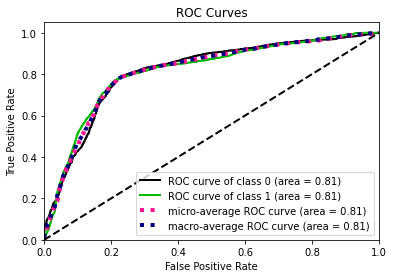

In [451]:
from sklearn.metrics import roc_curve
import scikitplot as skl
probas=gaussian.predict_proba(X)
skl.metrics.plot_roc(Y,probas)
plt.show()

## Saving The Model

In [452]:
mport joblib
joblib.dump(gaussian,"AvacadoModel.pkl")i

['AvacadoModel.pkl']